In [123]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Times New Roman']
plt.style.use('dark_background')
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white'
from collections import Counter

In [124]:
data = pd.read_csv('arxiv_papers.csv')

In [125]:
data

,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,published_journal,keywords,date
0,Insights on Galaxy Evolution from Interpretabl...,Galaxy appearances reveal the physics of how t...,['John F. Wu'],4.0,10.0,2.0,arxiv.org/pdf/2501.00089,Astrophysics of Galaxies,['Machine Learning'],AAS Journals,NaN,"['Galaxies (573)', 'Astronomy image processing...",2025-01-03
1,Hunting for the candidates of Changing-Look Bl...,The changing-look blazars (CLBs) are the blaza...,"['Shi-Ju Kang', 'Shan-Shan Ren', 'Yong-Gang Zh...",7.0,13.0,3.0,arxiv.org/pdf/2501.00094,High Energy Astrophysical Phenomena,NaN,ApJ,NaN,['Active galactic nuclei (16) – Blazars (164) ...,2025-01-03
2,First unambiguous detection of ammonia in the ...,The newly accessible mid-infrared (MIR) window...,"['Mathilde Mâlin', 'Anthony Boccaletti', 'Clém...",6.0,18.0,4.0,arxiv.org/pdf/2501.00104,Earth and Planetary Astrophysics,NaN,A&A,NaN,"['Planetary systems', 'Stars: individual: GJ 5...",2025-01-03
3,Exchange of meteorites between the terrestrial...,The evolution of the orbits of bodies ejected ...,['S.I. Ipatov'],0.0,6.0,0.0,arxiv.org/pdf/2501.00134,Earth and Planetary Astrophysics,NaN,NaN,Modern astronomy: from the Early Universe to e...,['planets and satellites: terrestrial planets'],2025-01-03
4,Autoencoder Reconstruction of Cosmological Mic...,Enhanced modeling of microlensing variations i...,"['Somayeh Khakpash', 'Federica Bianco', 'Georg...",11.0,18.0,1.0,arxiv.org/pdf/2501.00153,Instrumentation and Methods for Astrophysics,NaN,The Astrophysical Journal,NaN,['- Interdisciplinary astronomy(804) 1'],2025-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1505,Short-Term Balmer Line Emission Variability in...,"M Dwarfs make up the majority of stars, offeri...","['Aylin Garcia Soto', 'Girish M. Duvvuri', 'El...",10.0,19.0,6.0,arxiv.org/pdf/2502.02568,Solar and Stellar Astrophysics,NaN,NaN,NaN,['stars: activity — stars: low-mass — stars: r...,2025-02-05
1506,Primordial Sharp Features through the Nonlinea...,Sudden violations of the slow-roll regime duri...,"['Clément Stahl', 'Denis Werth', 'Vivian Poulin']",9.0,17.0,3.0,arxiv.org/pdf/2502.02571,Cosmology and Nongalactic Astrophysics,"['General Relativity and Quantum Cosmology', '...",NaN,NaN,[],2025-02-05
1507,Probing large-scale structures with the 2-poin...,Understanding the large-scale structure of the...,"['Camila Franco', 'Felipe Avila', 'Armando Ber...",18.0,18.0,0.0,arxiv.org/pdf/2502.02574,Cosmology and Nongalactic Astrophysics,NaN,NaN,NaN,['large-scale structure of Universe – cosmolog...,2025-02-05
1508,DIISC -- VI (COS-DIISC): UV Metal Absorption R...,As part of the Deciphering the Interplay betwe...,"['Brad Koplitz', 'Sanchayeeta Borthakur', 'Tim...",15.0,20.0,3.0,arxiv.org/pdf/2502.02583,Astrophysics of Galaxies,NaN,NaN,NaN,['Quasar-galaxy pairs (1316) — Quasar absorpti...,2025-02-05


In [126]:
authors = data['authors'].tolist()
# Flatten the list of authors and count occurrences
all_authors = [author for sublist in authors for author in sublist.split(', ')]
author_counts = Counter(all_authors)

# Find the most common author
most_common_author, count = author_counts.most_common(1)[0]
print(f"The most repeated author is {most_common_author} and they were repeated {count} times.")

# Find the second most common author
second_most_common_author, count = author_counts.most_common(2)[1]
print(f"The second most repeated author is {second_most_common_author} and they were repeated {count} times.")

The most repeated author is 'J. Carretero' and they were repeated 14 times.
The second most repeated author is 'M. Smith' and they were repeated 10 times.


In [127]:
primary_subjects = data['primary_subject'].tolist()
# Flatten the list of primary subjects and count occurrences
all_primary_subjects = [subject for sublist in primary_subjects for subject in sublist.split(', ')]
primary_subject_counts = Counter(all_primary_subjects)

# Find the most common primary subject
most_common_primary_subject, count = primary_subject_counts.most_common(1)[0]
print(f"The most repeated primary subject is {most_common_primary_subject} and it was repeated {count} times.")

# Find the 2nd most common primary subject
most_common_primary_subject_2, count = primary_subject_counts.most_common(2)[1]
print(f"The second most repeated primary subject is {most_common_primary_subject_2} and it was repeated {count} times.")

The most repeated primary subject is Astrophysics of Galaxies and it was repeated 380 times.
The second most repeated primary subject is High Energy Astrophysical Phenomena and it was repeated 348 times.


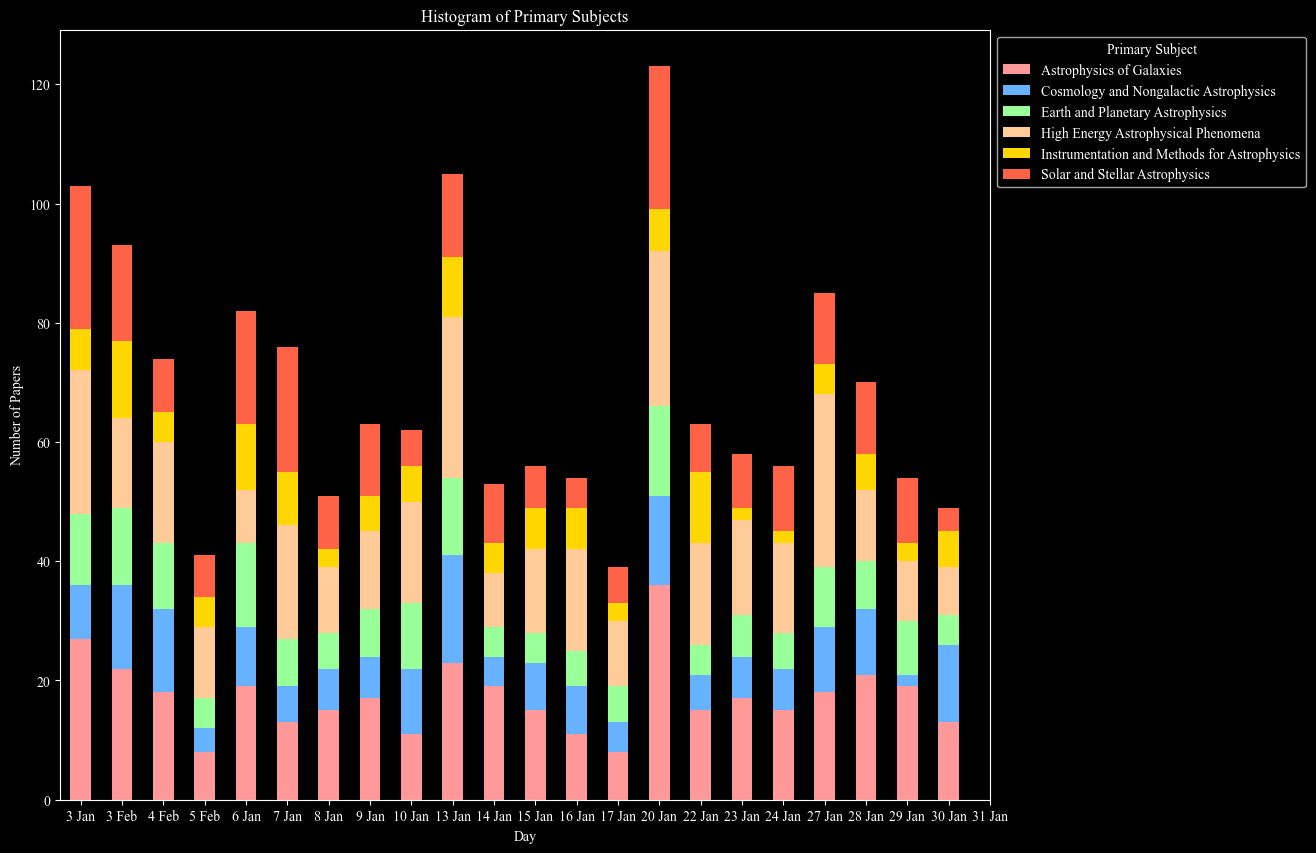

In [128]:
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.strftime('%b')

subject_counts_per_day = data.groupby(['day', 'primary_subject']).size().unstack(fill_value=0)

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347']

subject_counts_per_day.plot(kind='bar', stacked=True, figsize=(12, 10), color=colors)
plt.xlabel('Day')
plt.ylabel('Number of Papers')
plt.title('Histogram of Primary Subjects')

# Add month abbreviation to the x-axis ticks for unique days
unique_days = data[['day', 'month']].drop_duplicates().sort_values('day')
xticks_labels = [f"{day} {month}" for day, month in zip(unique_days['day'], unique_days['month'])]
plt.xticks(ticks=range(len(xticks_labels)), labels=xticks_labels, rotation=0)

plt.legend(title='Primary Subject', bbox_to_anchor=(1.00, 1), loc='upper left')
plt.show()

ValueError: The number of FixedLocator locations (22), usually from a call to set_ticks, does not match the number of labels (23).

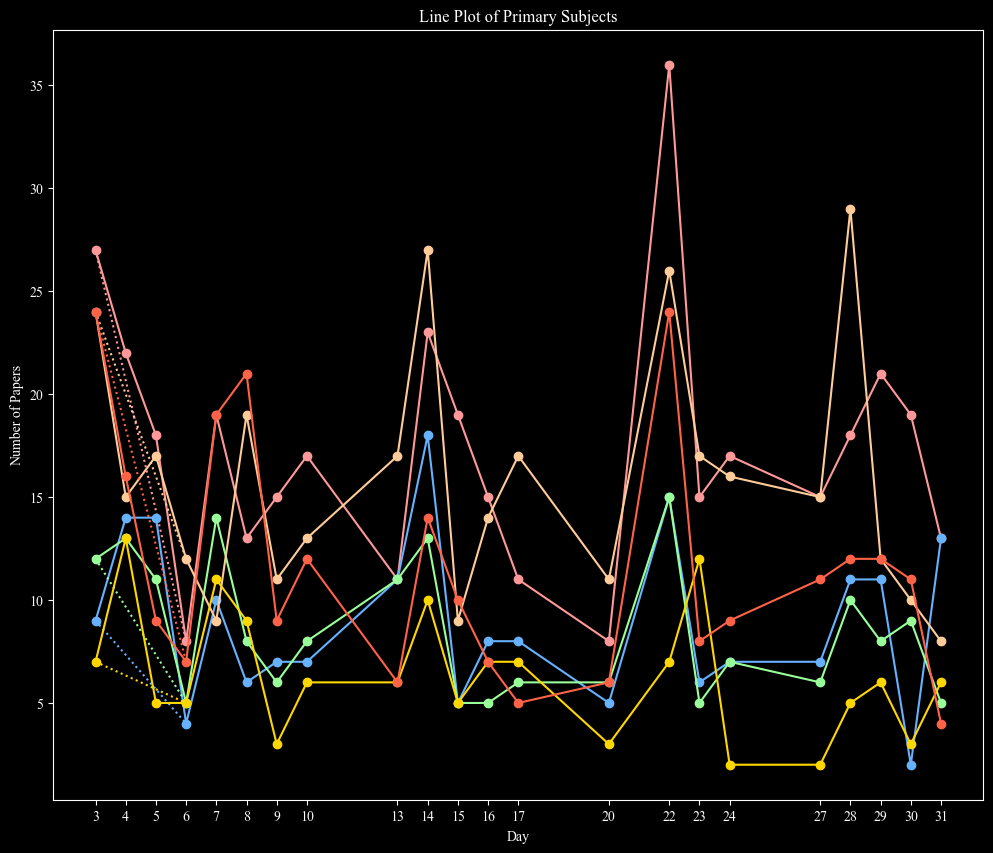

In [130]:
data['date'] = pd.to_datetime(data['date'])
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.strftime('%b')

subject_counts_per_day = data.groupby(['day', 'primary_subject']).size().unstack(fill_value=0)

colors = ['#FF9999', '#66B2FF', '#99FF99', '#FFCC99', '#FFD700', '#FF6347']

fig, ax = plt.subplots(figsize=(12, 10))

for i, subject in enumerate(subject_counts_per_day.columns):
    ax.plot(subject_counts_per_day.index, subject_counts_per_day[subject], color=colors[i], label=subject, marker='o')
    ax.plot([3, 6], [subject_counts_per_day.loc[3, subject], subject_counts_per_day.loc[6, subject]], color=colors[i], linestyle='dotted')

plt.xlabel('Day')
plt.ylabel('Number of Papers')
plt.title('Line Plot of Primary Subjects')

unique_days = data[['day', 'month']].drop_duplicates().sort_values('day')
xticks_labels = [f"{day} {month}" for day, month in zip(unique_days['day'], unique_days['month'])]
plt.xticks(ticks=subject_counts_per_day.index, labels=xticks_labels, rotation=0)

plt.legend(title='Primary Subject', bbox_to_anchor=(1.00, 1), loc='upper left')
plt.show()

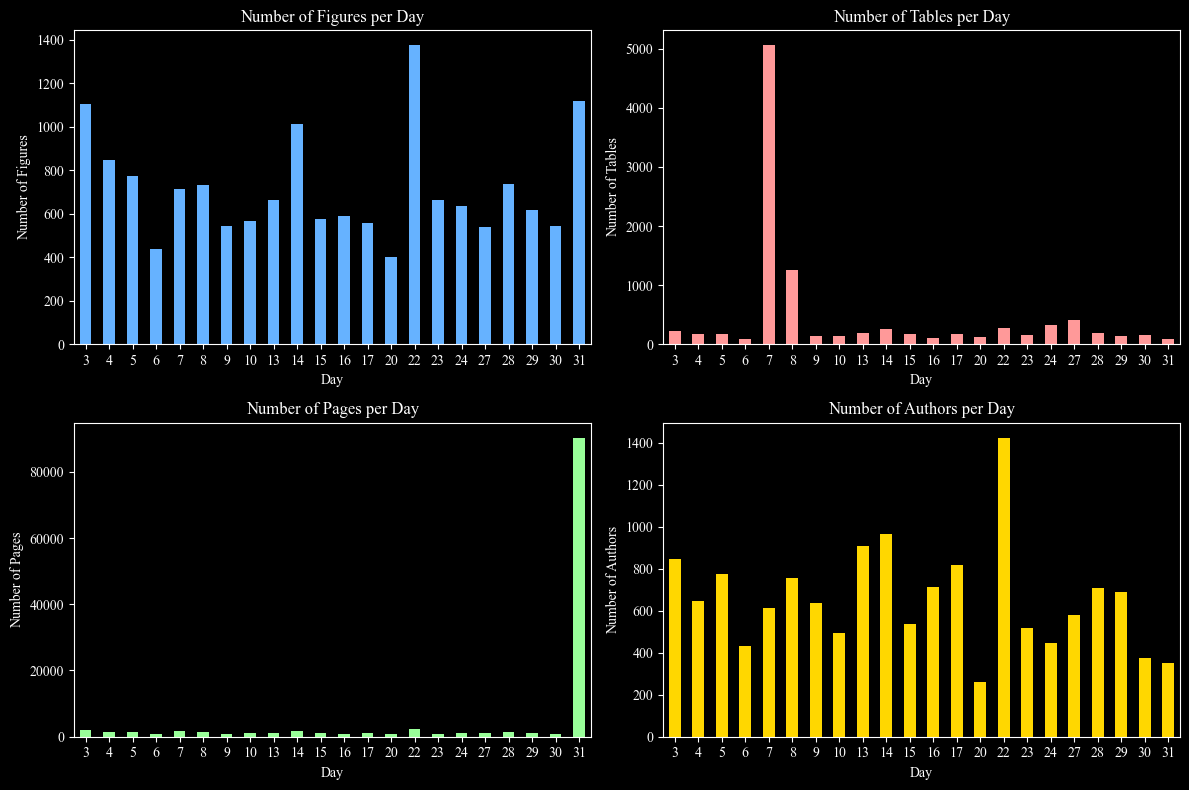

In [131]:
figures_per_day = data.groupby('day')['figures'].sum()
tables_per_day = data.groupby('day')['tables'].sum()
pages_per_day = data.groupby('day')['pages'].sum()
authors_per_day = data.groupby('day')['authors'].apply(lambda x: x.str.split(', ').str.len().sum())

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

figures_per_day.plot(kind='bar', ax=ax[0, 0], color='#66B2FF')
ax[0, 0].set_xlabel('Day')
ax[0, 0].set_ylabel('Number of Figures')
ax[0, 0].set_title('Number of Figures per Day')
ax[0, 0].set_xticks(range(len(figures_per_day)))
ax[0, 0].set_xticklabels(figures_per_day.index, rotation=0)

tables_per_day.plot(kind='bar', ax=ax[0, 1], color='#FF9999')
ax[0, 1].set_xlabel('Day')
ax[0, 1].set_ylabel('Number of Tables')
ax[0, 1].set_title('Number of Tables per Day')
ax[0, 1].set_xticks(range(len(tables_per_day)))
ax[0, 1].set_xticklabels(tables_per_day.index, rotation=0)

pages_per_day.plot(kind='bar', ax=ax[1, 0], color='#99FF99')
ax[1, 0].set_xlabel('Day')
ax[1, 0].set_ylabel('Number of Pages')
ax[1, 0].set_title('Number of Pages per Day')
ax[1, 0].set_xticks(range(len(pages_per_day)))
ax[1, 0].set_xticklabels(pages_per_day.index, rotation=0)

authors_per_day.plot(kind='bar', ax=ax[1, 1], color='#FFD700')
ax[1, 1].set_xlabel('Day')
ax[1, 1].set_ylabel('Number of Authors')
ax[1, 1].set_title('Number of Authors per Day')
ax[1, 1].set_xticks(range(len(authors_per_day)))
ax[1, 1].set_xticklabels(authors_per_day.index, rotation=0)

plt.tight_layout()
plt.show()


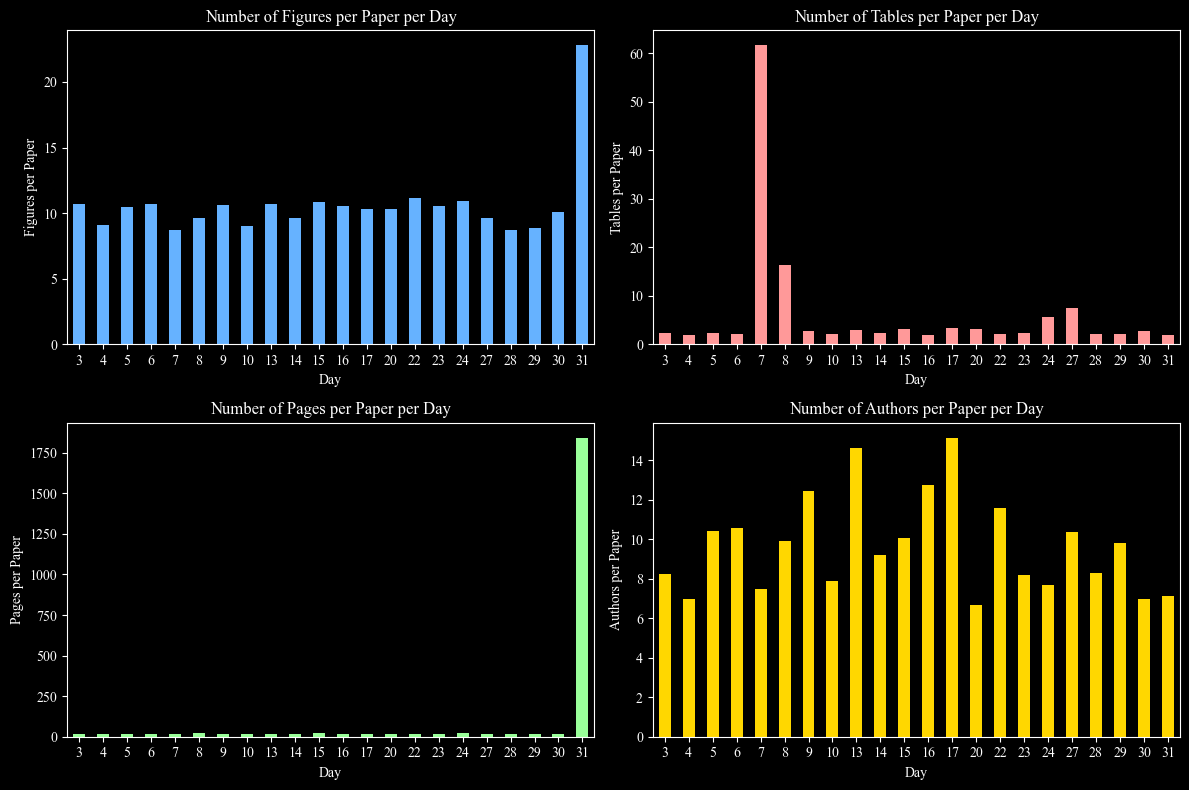

In [132]:
papers_per_day = data.groupby('day').size()

figures_per_paper = figures_per_day / papers_per_day
tables_per_paper = tables_per_day / papers_per_day
pages_per_paper = pages_per_day / papers_per_day
authors_per_paper = authors_per_day / papers_per_day

fig, ax = plt.subplots(2, 2, figsize=(12, 8))

figures_per_paper.plot(kind='bar', ax=ax[0, 0], color='#66B2FF')
ax[0, 0].set_xlabel('Day')
ax[0, 0].set_ylabel('Figures per Paper')
ax[0, 0].set_title('Number of Figures per Paper per Day')
ax[0, 0].set_xticks(range(len(figures_per_paper)))
ax[0, 0].set_xticklabels(figures_per_paper.index, rotation=0)

tables_per_paper.plot(kind='bar', ax=ax[0, 1], color='#FF9999')
ax[0, 1].set_xlabel('Day')
ax[0, 1].set_ylabel('Tables per Paper')
ax[0, 1].set_title('Number of Tables per Paper per Day')
ax[0, 1].set_xticks(range(len(tables_per_paper)))
ax[0, 1].set_xticklabels(tables_per_paper.index, rotation=0)

pages_per_paper.plot(kind='bar', ax=ax[1, 0], color='#99FF99')
ax[1, 0].set_xlabel('Day')
ax[1, 0].set_ylabel('Pages per Paper')
ax[1, 0].set_title('Number of Pages per Paper per Day')
ax[1, 0].set_xticks(range(len(pages_per_paper)))
ax[1, 0].set_xticklabels(pages_per_paper.index, rotation=0)

authors_per_paper.plot(kind='bar', ax=ax[1, 1], color='#FFD700')
ax[1, 1].set_xlabel('Day')
ax[1, 1].set_ylabel('Authors per Paper')
ax[1, 1].set_title('Number of Authors per Paper per Day')
ax[1, 1].set_xticks(range(len(authors_per_paper)))
ax[1, 1].set_xticklabels(authors_per_paper.index, rotation=0)

plt.tight_layout()
plt.show()


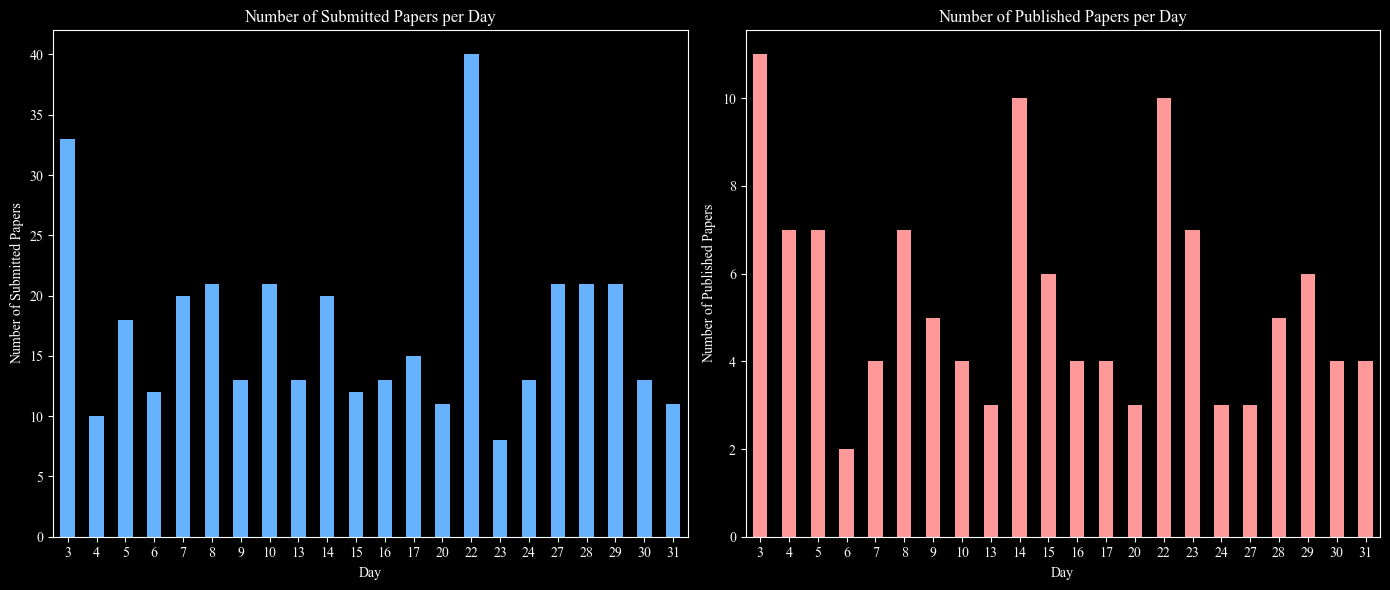

In [133]:
submitted_papers_per_day = data.groupby('day')['submitted_journal'].count()
published_papers_per_day = data.groupby('day')['published_journal'].count()

fig, ax = plt.subplots(1, 2, figsize=(14, 6))

submitted_papers_per_day.plot(kind='bar', ax=ax[0], color='#66B2FF')
ax[0].set_xlabel('Day')
ax[0].set_ylabel('Number of Submitted Papers')
ax[0].set_title('Number of Submitted Papers per Day')
ax[0].set_xticks(range(len(submitted_papers_per_day)))
ax[0].set_xticklabels(submitted_papers_per_day.index, rotation=0)

published_papers_per_day.plot(kind='bar', ax=ax[1], color='#FF9999')
ax[1].set_xlabel('Day')
ax[1].set_ylabel('Number of Published Papers')
ax[1].set_title('Number of Published Papers per Day')
ax[1].set_xticks(range(len(published_papers_per_day)))
ax[1].set_xticklabels(published_papers_per_day.index, rotation=0)

plt.tight_layout()
plt.show()

In [134]:
keywords = data['keywords'].tolist()

# Flatten the list of keywords and count occurrences
all_keywords = [keyword for sublist in keywords for keyword in sublist.split(', ')]
keyword_counts = Counter(all_keywords)

# Find the most common keyword
most_common_keyword, count = keyword_counts.most_common(1)[0]
print(f"The most repeated keyword is {most_common_keyword} and it was repeated {count} times.")

# Second most common keyword
second_most_common_keyword, count = keyword_counts.most_common(2)[1]
print(f"The second most repeated keyword is {second_most_common_keyword} and it was repeated {count} times.")


The most repeated keyword is [] and it was repeated 426 times.
The second most repeated keyword is 'accretion'] and it was repeated 8 times.


In [135]:
# Find the author papers
author = 'J. Carretero'
papers = data[data['authors'].str.contains(author)]
papers


,title,abstract,authors,figures,pages,tables,pdf_link,primary_subject,secondary_subjects,submitted_journal,published_journal,keywords,date,day,month
70,Photometry of outer Solar System objects from ...,For the 696 trans-Neptunian objects (TNOs) wit...,"['Pedro H. Bernardinelli', 'Gary M. Bernstein'...",13.0,52.0,4.0,arxiv.org/pdf/2501.01551,Earth and Planetary Astrophysics,['Instrumentation and Methods for Astrophysics...,NaN,NaN,[],2025-01-06,6,Jan
337,Euclid: Detecting Solar System objects in Eucl...,The ESA Euclid mission will survey more than 1...,"['A. A. Nucita', 'L. Conversi', 'A. Verdier', ...",11.0,15.0,2.0,arxiv.org/pdf/2501.05023,Instrumentation and Methods for Astrophysics,NaN,NaN,NaN,"['minor planets', 'asteroids: general – Planet...",2025-01-10,10,Jan
390,Dark Energy Survey Year 6 Results: Cell-based ...,We present the Metadetection weak lensing gala...,"['M. Yamamoto', 'M. R. Becker', 'E. Sheldon', ...",22.0,30.0,7.0,arxiv.org/pdf/2501.05665,Cosmology and Nongalactic Astrophysics,['Instrumentation and Methods for Astrophysics'],NaN,NaN,['gravitational lensing: weak – cosmology: obs...,2025-01-13,13,Jan
392,Dark Energy Survey Year 6 Results: Synthetic-s...,"Synthetic source injection (SSI), the insertio...","['D. Anbajagane', 'M. Tabbutt', 'J. Beas-Gonza...",18.0,29.0,2.0,arxiv.org/pdf/2501.05683,Cosmology and Nongalactic Astrophysics,['Astrophysics of Galaxies'],NaN,NaN,['sky surveys - astronomical simulations - cos...,2025-01-13,13,Jan
397,Dark Energy Survey Year 3 Results: Photometric...,We describe the photometric data set assembled...,"['K. Bechtol', 'I. Sevilla-Noarbe', 'A. Drlica...",21.0,27.0,7.0,arxiv.org/pdf/2501.05739,Cosmology and Nongalactic Astrophysics,NaN,NaN,NaN,['Surveys – Observational cosmology – Dark ene...,2025-01-13,13,Jan
399,Dark Energy Survey Year 6 Results: Point-Sprea...,We present the point-spread function (PSF) mod...,"['T. Schutt', 'M. Jarvis', 'A. Roodman', 'A. A...",24.0,33.0,1.0,arxiv.org/pdf/2501.05781,Cosmology and Nongalactic Astrophysics,['Instrumentation and Methods for Astrophysics'],NaN,NaN,[],2025-01-13,13,Jan
463,Comparing the DES-SN5YR and Pantheon+ SN cosmo...,Recent cosmological analyses measuring distanc...,"['M. Vincenzi', 'R. Kessler', 'P. Shah', 'J. L...",5.0,9.0,8.0,arxiv.org/pdf/2501.06664,Cosmology and Nongalactic Astrophysics,NaN,NaN,NaN,"['cosmology', 'supernovae', 'dark energy 1 CON...",2025-01-14,14,Jan
532,Euclid: Optimising tomographic redshift binnin...,We present a simulation-based method to explor...,"['J. H. W. Wong', 'M. L. Brown', 'C. A. J. Dun...",17.0,28.0,1.0,arxiv.org/pdf/2501.07559,Cosmology and Nongalactic Astrophysics,NaN,NaN,NaN,['Cosmology: observations – dark energy – cosm...,2025-01-14,14,Jan
589,Euclid preparation LX. The use of HST images a...,Data from the Euclid space telescope will enab...,"['Euclid Collaboration', 'D. Scognamiglio', 'T...",20.0,23.0,2.0,arxiv.org/pdf/2501.08372,Cosmology and Nongalactic Astrophysics,NaN,A&A,NaN,['gravitational lensing: weak - techniques - c...,2025-01-16,16,Jan
742,High-Significance Detection of Correlation Bet...,Our understanding of the $\gamma$-ray sky has ...,"['B. Thakore', 'M. Negro', 'M. Regis', 'S. Cam...",15.0,34.0,5.0,arxiv.org/pdf/2501.10506,Cosmology and Nongalactic Astrophysics,['High Energy Astrophysical Phenomena'],NaN,NaN,[],2025-01-22,22,Jan
